In [1]:
import numpy as np
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

#Determines LogP
def logP(smiles):
    
    return(Descriptors.MolLogP(Chem.MolFromSmiles(smiles)))

#Determines molecular weight
def molWt(smiles):
    
    return(Descriptors.MolWt(Chem.MolFromSmiles(smiles)))

#Determine number hydrogen bond acceptors
def numAcc(smiles):
    
    return(Descriptors.NumHAcceptors(Chem.MolFromSmiles(smiles)))

#Determine number hydrogen bond donors
def numDon(smiles):
    
    return(Descriptors.NumHDonors(Chem.MolFromSmiles(smiles)))

#Determine polar surface area
def polSur(smiles):
    
    return(Descriptors.TPSA(Chem.MolFromSmiles(smiles)))

#Determine number of rotatable bonds
def rolBon(smiles):
    return(Descriptors.NumRotatableBonds(Chem.MolFromSmiles(smiles)))

molProps = np.empty((0,5))
i = 0 
#Read in data file line by line
for molecule in open("smiles.txt", "r"):
    if i < 10000:
        molecule = molecule.replace("G", "")
        try:
            #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, polar surface area]
            props = np.reshape(np.array([logP(molecule), molWt(molecule), numAcc(molecule), numDon(molecule), rolBon(molecule)]), (1, 5))
            #Append properties
            molProps = np.append(molProps, props, axis=0)
        
        except:
            #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
            molecule.replace(molecule, "")
            continue
        i += 1
    else:
        break

molProps1 = np.empty((0,5))
#Read in data file line by line
for line in open("generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props1 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps1 = np.append(molProps1, props1, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue
    
#PCA visualization
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
printmols = np.concatenate((molProps, molProps1), axis=0)
#Scale array of properties for all molecules
scaledProps = StandardScaler().fit_transform(printmols)

#Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaledProps)
#Graph
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(principalComponents[0:np.shape(molProps)[0],0],principalComponents[0:np.shape(molProps)[0],1], color = "#293352")
plt.scatter(principalComponents[np.shape(molProps)[0]:,0],principalComponents[np.shape(molProps)[0]:,1], color = "#A51C30")
plt.show(fig)

<Figure size 640x480 with 1 Axes>

In [3]:
fig.savefig("trainingdatamolprops.png", dpi=600)

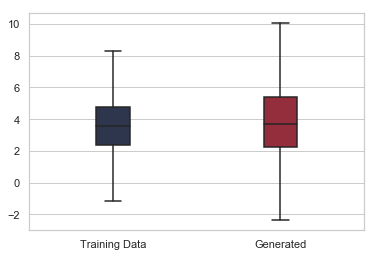

In [2]:
#import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

pandaprops = pd.DataFrame(molProps[:,0])
pandaprops1 = pd.DataFrame(molProps1[:,0])
pandalogp = pd.concat([pandaprops,pandaprops1], ignore_index=True, axis=1)
pandalogp.columns = ["Training Data", "Generated"]

molpropslogp = sns.boxplot(data=pandalogp, showfliers=False, width = .2, palette=["#293352", "#A51C30"]);
fig = molpropslogp.get_figure()
#molProps is the training data
#molProps1 is the generated molecules

fig.savefig("traingenbox.png", dpi=600)

In [3]:
molProps1 = np.empty((0,5))
#Read in data file line by line
for line in open("generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props1 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps1 = np.append(molProps1, props1, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue
        
molProps2 = np.empty((0,5))
#Read in data file line by line
for line in open("1generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props2 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps2 = np.append(molProps2, props2, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue
        
molProps3 = np.empty((0,5))
#Read in data file line by line
for line in open("2generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props3 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps3 = np.append(molProps3, props3, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue

molProps4 = np.empty((0,5))
#Read in data file line by line
for line in open("3generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props4 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps4 = np.append(molProps4, props4, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue
        
molProps5 = np.empty((0,5))
#Read in data file line by line
for line in open("4generatedmols.txt", "r"):
    try:
        #Array of properties [partition coefficient, molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, number of rotatable bonds]
        props5 = np.reshape(np.array([logP(line), molWt(line), numAcc(line), numDon(line), rolBon(line)]), (1, 5))
        #Append properties
        molProps5 = np.append(molProps5, props5, axis=0)
        
    except:
        #Occasionally RDKit bugs don't allow for analyzing the molecule; in these cases, simply remove the molecule
        line.replace(line, "")
        continue

In [4]:
print(np.shape(molProps1))
print(np.shape(molProps2))
print(np.shape(molProps3))
print(np.shape(molProps4))
print(np.shape(molProps5))

(3065, 5)
(1218, 5)
(5588, 5)
(2097, 5)
(1641, 5)


In [5]:
satisfies1= np.empty((0,5))
for i in range(np.shape(molProps1)[0]):
    satlogp = 0
    satmolwt = 0
    satacc = 0
    satdon = 0
    satbon = 0
    
    if molProps1[i,0] <= 3: 
        satlogp += 1
    if molProps1[i,1] <= 480: 
        satmolwt += 1
    if molProps1[i,2] <= 3: 
        satacc += 1
    if molProps1[i,3] <= 3: 
        satdon += 1
    if molProps1[i,4] <= 3: 
        satbon += 1
    
    satisfy = np.reshape(np.array([satlogp, satmolwt, satacc, satdon, satbon]), (1, 5))
    satisfies1 = np.append(satisfies1, satisfy, axis=0)

In [6]:
satisfies2= np.empty((0,5))
for i in range(np.shape(molProps2)[0]):
    satlogp = 0
    satmolwt = 0
    satacc = 0
    satdon = 0
    satbon = 0
    
    if molProps2[i,0] <= 3: 
        satlogp += 1
    if molProps2[i,1] <= 480: 
        satmolwt += 1
    if molProps2[i,2] <= 3: 
        satacc += 1
    if molProps2[i,3] <= 3: 
        satdon += 1
    if molProps2[i,4] <= 3: 
        satbon += 1
    
    satisfy = np.reshape(np.array([satlogp, satmolwt, satacc, satdon, satbon]), (1, 5))
    satisfies2 = np.append(satisfies2, satisfy, axis=0)

In [7]:
satisfies3= np.empty((0,5))
for i in range(np.shape(molProps3)[0]):
    satlogp = 0
    satmolwt = 0
    satacc = 0
    satdon = 0
    satbon = 0
    
    if molProps3[i,0] <= 3: 
        satlogp += 1
    if molProps3[i,1] <= 480: 
        satmolwt += 1
    if molProps3[i,2] <= 3: 
        satacc += 1
    if molProps3[i,3] <= 3: 
        satdon += 1
    if molProps3[i,4] <= 3: 
        satbon += 1
    
    satisfy = np.reshape(np.array([satlogp, satmolwt, satacc, satdon, satbon]), (1, 5))
    satisfies3 = np.append(satisfies3, satisfy, axis=0)

In [8]:
satisfies4 = np.empty((0,5))
for i in range(np.shape(molProps4)[0]):
    satlogp = 0
    satmolwt = 0
    satacc = 0
    satdon = 0
    satbon = 0
    
    if molProps4[i,0] <= 3: 
        satlogp += 1
    if molProps4[i,1] <= 480: 
        satmolwt += 1
    if molProps4[i,2] <= 3: 
        satacc += 1
    if molProps4[i,3] <= 3: 
        satdon += 1
    if molProps4[i,4] <= 3: 
        satbon += 1
    
    satisfy = np.reshape(np.array([satlogp, satmolwt, satacc, satdon, satbon]), (1, 5))
    satisfies4 = np.append(satisfies4, satisfy, axis=0)

In [9]:
satisfies5 = np.empty((0,5))
for i in range(np.shape(molProps5)[0]):
    satlogp = 0
    satmolwt = 0
    satacc = 0
    satdon = 0
    satbon = 0
    
    if molProps5[i,0] <= 3: 
        satlogp += 1
    if molProps5[i,1] <= 480: 
        satmolwt += 1
    if molProps5[i,2] <= 3: 
        satacc += 1
    if molProps5[i,3] <= 3: 
        satdon += 1
    if molProps5[i,4] <= 3: 
        satbon += 1
    
    satisfy = np.reshape(np.array([satlogp, satmolwt, satacc, satdon, satbon]), (1, 5))
    satisfies5 = np.append(satisfies5, satisfy, axis=0)

In [10]:
percentgood = np.empty((0,5))

In [11]:
good1 = 0
good2 = 0
good3 = 0
good4 = 0
good5 = 0

for i in range(np.shape(satisfies1)[0]):
    if np.sum(satisfies1[i,:]) >= 1:
        good1 += 1
    if np.sum(satisfies1[i,:]) >= 2:
        good2 += 1
    if np.sum(satisfies1[i,:]) >= 3:
        good3 += 1
    if np.sum(satisfies1[i,:]) >= 4:
        good4 += 1        
    if np.sum(satisfies1[i,:]) >= 5:
        good5 += 1        
        
percentgood1 = 100 * good1 / np.shape(satisfies1)[0]
percentgood2 = 100 * good2 / np.shape(satisfies1)[0]
percentgood3 = 100 * good3 / np.shape(satisfies1)[0]
percentgood4 = 100 * good4 / np.shape(satisfies1)[0]
percentgood5 = 100 * good5 / np.shape(satisfies1)[0]
percentgood = np.append(percentgood, np.reshape(np.array([percentgood1, percentgood2, percentgood3, percentgood4, percentgood5]), (1,5)), axis = 0)
print(percentgood)

[[96.18270799 77.06362153 42.80587276 11.38662316  1.40293638]]


In [12]:
good1 = 0
good2 = 0
good3 = 0
good4 = 0
good5 = 0

for i in range(np.shape(satisfies2)[0]):
    if np.sum(satisfies2[i,:]) >= 1:
        good1 += 1
    if np.sum(satisfies2[i,:]) >= 2:
        good2 += 1
    if np.sum(satisfies2[i,:]) >= 3:
        good3 += 1
    if np.sum(satisfies2[i,:]) >= 4:
        good4 += 1        
    if np.sum(satisfies2[i,:]) >= 5:
        good5 += 1        
        
percentgood1 = 100 * good1 / np.shape(satisfies2)[0]
percentgood2 = 100 * good2 / np.shape(satisfies2)[0]
percentgood3 = 100 * good3 / np.shape(satisfies2)[0]
percentgood4 = 100 * good4 / np.shape(satisfies2)[0]
percentgood5 = 100 * good5 / np.shape(satisfies2)[0]
percentgood = np.append(percentgood, np.reshape(np.array([percentgood1, percentgood2, percentgood3, percentgood4, percentgood5]), (1,5)), axis = 0)
print(percentgood)

[[96.18270799 77.06362153 42.80587276 11.38662316  1.40293638]
 [97.78325123 85.5500821  45.81280788 11.9047619   1.72413793]]


In [13]:
good1 = 0
good2 = 0
good3 = 0
good4 = 0
good5 = 0

for i in range(np.shape(satisfies3)[0]):
    if np.sum(satisfies3[i,:]) >= 1:
        good1 += 1
    if np.sum(satisfies3[i,:]) >= 2:
        good2 += 1
    if np.sum(satisfies3[i,:]) >= 3:
        good3 += 1
    if np.sum(satisfies3[i,:]) >= 4:
        good4 += 1        
    if np.sum(satisfies3[i,:]) >= 5:
        good5 += 1        
        
percentgood1 = 100 * good1 / np.shape(satisfies3)[0]
percentgood2 = 100 * good2 / np.shape(satisfies3)[0]
percentgood3 = 100 * good3 / np.shape(satisfies3)[0]
percentgood4 = 100 * good4 / np.shape(satisfies3)[0]
percentgood5 = 100 * good5 / np.shape(satisfies3)[0]
percentgood = np.append(percentgood, np.reshape(np.array([percentgood1, percentgood2, percentgood3, percentgood4, percentgood5]), (1,5)), axis = 0)
print(percentgood)

[[96.18270799 77.06362153 42.80587276 11.38662316  1.40293638]
 [97.78325123 85.5500821  45.81280788 11.9047619   1.72413793]
 [99.57050823 88.81531854 58.78668576 19.61345741  4.00858984]]


In [14]:
good1 = 0
good2 = 0
good3 = 0
good4 = 0
good5 = 0

for i in range(np.shape(satisfies4)[0]):
    if np.sum(satisfies4[i,:]) >= 1:
        good1 += 1
    if np.sum(satisfies4[i,:]) >= 2:
        good2 += 1
    if np.sum(satisfies4[i,:]) >= 3:
        good3 += 1
    if np.sum(satisfies4[i,:]) >= 4:
        good4 += 1        
    if np.sum(satisfies4[i,:]) >= 5:
        good5 += 1        
        
percentgood1 = 100 * good1 / np.shape(satisfies4)[0]
percentgood2 = 100 * good2 / np.shape(satisfies4)[0]
percentgood3 = 100 * good3 / np.shape(satisfies4)[0]
percentgood4 = 100 * good4 / np.shape(satisfies4)[0]
percentgood5 = 100 * good5 / np.shape(satisfies4)[0]
percentgood = np.append(percentgood, np.reshape(np.array([percentgood1, percentgood2, percentgood3, percentgood4, percentgood5]), (1,5)), axis = 0)
print(percentgood)

[[96.18270799 77.06362153 42.80587276 11.38662316  1.40293638]
 [97.78325123 85.5500821  45.81280788 11.9047619   1.72413793]
 [99.57050823 88.81531854 58.78668576 19.61345741  4.00858984]
 [98.85550787 86.45684311 53.02813543 18.74105866  3.81497377]]


In [15]:
good1 = 0
good2 = 0
good3 = 0
good4 = 0
good5 = 0

for i in range(np.shape(satisfies5)[0]):
    if np.sum(satisfies5[i,:]) >= 1:
        good1 += 1
    if np.sum(satisfies5[i,:]) >= 2:
        good2 += 1
    if np.sum(satisfies5[i,:]) >= 3:
        good3 += 1
    if np.sum(satisfies5[i,:]) >= 4:
        good4 += 1        
    if np.sum(satisfies5[i,:]) >= 5:
        good5 += 1        
        
percentgood1 = 100 * good1 / np.shape(satisfies5)[0]
percentgood2 = 100 * good2 / np.shape(satisfies5)[0]
percentgood3 = 100 * good3 / np.shape(satisfies5)[0]
percentgood4 = 100 * good4 / np.shape(satisfies5)[0]
percentgood5 = 100 * good5 / np.shape(satisfies5)[0]
percentgood = np.append(percentgood, np.reshape(np.array([percentgood1, percentgood2, percentgood3, percentgood4, percentgood5]), (1,5)), axis = 0)
print(percentgood)

[[96.18270799 77.06362153 42.80587276 11.38662316  1.40293638]
 [97.78325123 85.5500821  45.81280788 11.9047619   1.72413793]
 [99.57050823 88.81531854 58.78668576 19.61345741  4.00858984]
 [98.85550787 86.45684311 53.02813543 18.74105866  3.81497377]
 [98.53747715 89.94515539 60.57282145 30.53016453  8.65326021]]


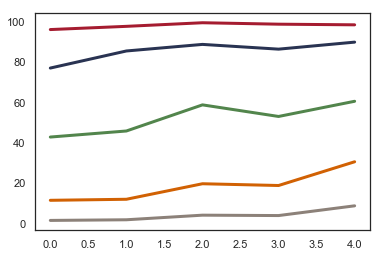

In [16]:
pandagood1 = pd.DataFrame(percentgood[:,0])
pandagood2 = pd.DataFrame(percentgood[:,1])
pandagood3 = pd.DataFrame(percentgood[:,2])
pandagood4 = pd.DataFrame(percentgood[:,3])
pandagood5 = pd.DataFrame(percentgood[:,4])

sns.set(style="white")
#percent generated molecules meeting at least 1 criteria
ax = sns.lineplot(data = pandagood1, linewidth = 3, palette=["#A51C30"], legend = False)
#percent generated molecules meeting at least 2 criteria
ax = sns.lineplot(data = pandagood2, linewidth = 3, palette=["#293352"], legend = False)
#percent generated molecules meeting at least 3 criteria
ax = sns.lineplot(data = pandagood3, linewidth = 3, palette=["#52854C"], legend = False)
#percent generated molecules meeting at least 4 criteria
ax = sns.lineplot(data = pandagood4, linewidth = 3, palette=["#D16103"], legend = False)
#percent generated molecules meeting at least 5 criteria
ax = sns.lineplot(data = pandagood5, linewidth = 3, palette=["#8C8179"], legend = False)